In [2]:
import sys
print(sys.version)

3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random
import zipfile

#import cv2
#import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
folder = r"C:\Users\jankowiaka\Documents\python\mag\Generated_img\Selected\No_Labels\\"
png = '.png'

In [5]:
def load_images_from_folder(folder, max_images=140):
    images = []
    count = 0
    
    for filename in os.listdir(folder):
        if count >= max_images:
            break
        
        file_path = os.path.join(folder, filename)
        try:
            img = Image.open(file_path).convert('L')
            arr_im = np.array(img)
            images.append(arr_im)
            count += 1
        except (IOError, OSError) as e:
            print(f"Cannot open {file_path}: {e}")
    
    return images


In [7]:
#Tablica przechowująca zdjęcia osób
train_ppl = []

for i in range(1,11):
    images = []
    images = load_images_from_folder(folder+str(i))
    train_ppl.append(images)

for i in range(27,41):
    images = []
    images = load_images_from_folder(folder+str(i))
    train_ppl.append(images)

In [10]:
w, h = 64, 128
data = np.zeros((h, w), dtype=np.uint8)

In [11]:
#############################################
#       Tworzenie próbek treningowych       #
#                  Pozytywne                #
#############################################


#Laczna ilosc zdjec
train_len = 15120

rozmiar = 100
train = []
n = 0

# Inicjalizacja tablicy zerami 
train_labels = np.zeros(train_len, dtype=np.uint8)

#Stworzenie nowego katalogu
train_path = r"C:\Users\jankowiaka\Documents\python\mag\Dataset_both\Fake_No_Label\Train\\"
if not os.path.exists(train_path):
    os.makedirs(train_path)

#Petla przechodzi po ludziach
for i in range(24):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                
                a = 0
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(len(train_ppl[i][j+l])):
                    p = 2*p
                    data[p] = train_ppl[i][j+l][a]
                    data[p+1] = train_ppl[i][9-k+l][a]
                    a = a + 1
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(train_path+str(n)+png) 
      
                train.append(con)
                train_labels[n] = 1
                n = n + 1   
print(n)

7560


In [12]:
#############################################
#       Tworzenie próbek treningowych       #
#                  Neagtywne                #
#############################################
w, h = 64, 128

x = 0 #Licznik 

m = 25
rozne = []


for i in range(24):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                a = 0
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = train_ppl[i][10*rand_1+j][a]
                    data[p+1] = train_ppl[i+k][10*rand_2+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                            
                x = x + 1
                rozne.append(con)
print(x)

27600


In [13]:
# Wybranie odpowiedniej ilości próbke
for i in range(train_len - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(train_path+str(n)+png) 
    
    train.append(con)
    
    train_labels[n] = 0
    n = n + 1
    
print(n)

15120


In [14]:
print(n)
print(len(train))

print(train_labels[10000])

15120
15120
0


In [15]:
#Zapis tablicy do pliku CSV
train_labels.tofile(train_path+'train.csv', sep = ' ') 

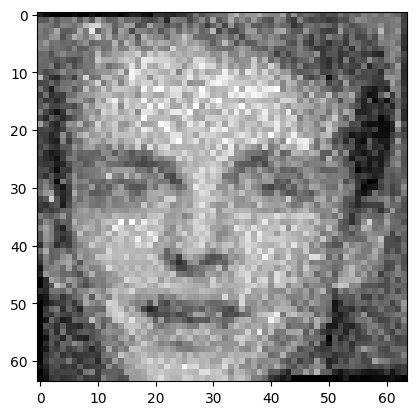

In [16]:
plt.imshow(images[120], cmap = 'gray')
